In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100

sns.set_style('whitegrid')
sns.set(font_scale=1)

import scipy.stats.stats as st


define data path and data name

In [2]:
datPath = ('../data//')
trainFile = 'train.json'
testFile = 'test.json'

In [3]:
# read-in data
trainData_OG = pd.read_json(datPath + trainFile)
testData_OG = pd.read_json(datPath + testFile)

In [4]:
# make a copy to original data in case mis-manipulate
train = trainData_OG.copy()
test = testData_OG.copy()
print(train.shape)
train.head(3)

(49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street


In [5]:
# print the feature names
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address'],
      dtype='object')

In [6]:
# print the variable type of features
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
# quick view of summary statistic of numeric/categorical features
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


From the table, we can easily find out that price feature might have outliers since its max value is unlikely within reasonable range. We can visualize in the exploratory data analysis session.

Is there any missing data? From the print out of train dataset, we can easily see there are empty valued features. However, since the types of features in data are not consistent, so we left the empty/spaced feature values for the time being and come back to them later.


# EDA and feature engineering

First thing of first, we want to know the proportion of low, medium and high interest levels in data. The most straightforward way is to visualize as a pie chart

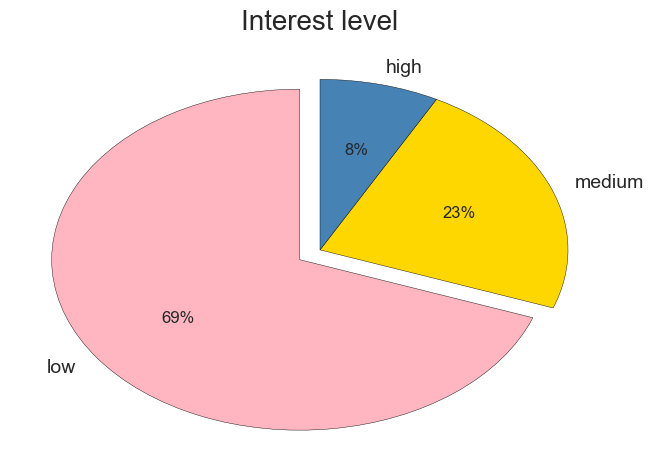

In [8]:
ratioInterestLevel = train['interest_level'].value_counts().values


plt.plot(figsize=(8,4))
patches, texts, autotexts=plt.pie(ratioInterestLevel, startangle=90, explode=[0.1, 0, 0], labels=['low','medium','high'], 
        colors=['lightpink','gold','steelblue'],autopct="%1.0f%%");
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
texts[2].set_fontsize(14)
plt.title('Interest level', fontsize=20);

Visualize the number of bathrooms and bedrooms -- seem reasonable

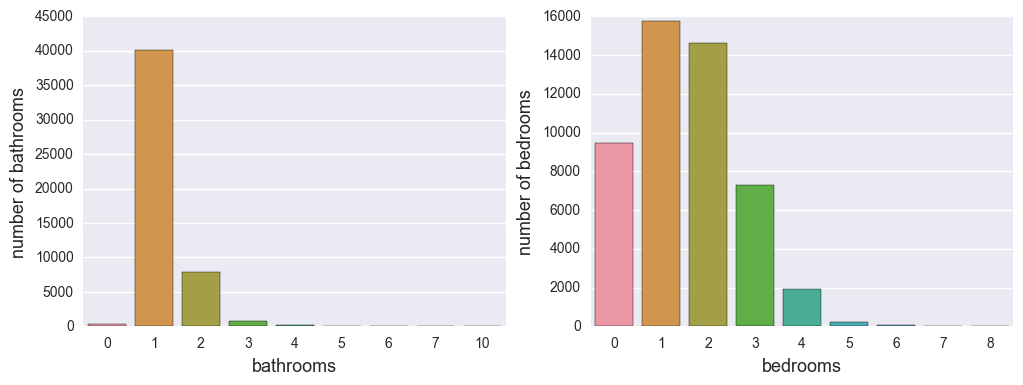

In [9]:
fig = plt.figure(figsize=(12, 4))

sns.countplot(train['bathrooms'].astype(int), ax = plt.subplot(121));
plt.xlabel('bathrooms', fontsize=13);
plt.ylabel('number of bathrooms', fontsize=13);

sns.countplot(train['bedrooms'], ax = plt.subplot(122));
plt.xlabel('bedrooms', fontsize=13);
plt.ylabel('number of bedrooms', fontsize=13);

#sns.FacetGrid(train, hue='bedrooms', size = 10).map(sns.kdeplot, 'price').add_legend();

How price changes over different number of bedroom/bathroom? From the kernel density plots given below, we can see that price is distinguishable between proporties with small numer of bedrooms/bathrooms (n <= 3) and one with large numer of bedrooms/bathrooms (n > 3).

As we suspect feature price has outliers, scatterplot is therefore drawn

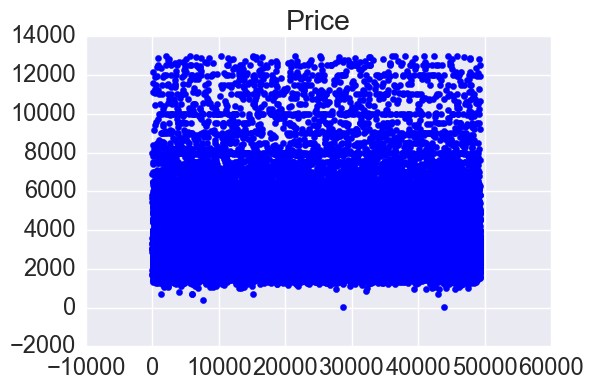

In [356]:
plt.figure(figsize=(6, 4))
plt.title('Price')
plt.scatter(np.arange(train.shape[0]), train['price'], color = 'blue');

Of course, there are four outliers so we need to replace them by median value of price feature. Note that we can't use mean value, as the mean value will be affected by outliers.

In [357]:
outlierDefineVal = np.percentile(train.price.values, 99)
outlierVal_Perc99 = np.percentile(train.price.values, 99)
outlierVal_Perc95 = np.percentile(train.price.values, 95)
seed = 7

In [363]:
def clearPrice(price):
    if price < outlierDefineVal:
        return price
    else:
        return np.random.randint(outlierVal_Perc95, outlierVal_Perc99)

In [364]:
train['price'] = trainData_OG['price']

In [365]:
train['price'] = train['price'].map(clearPrice)

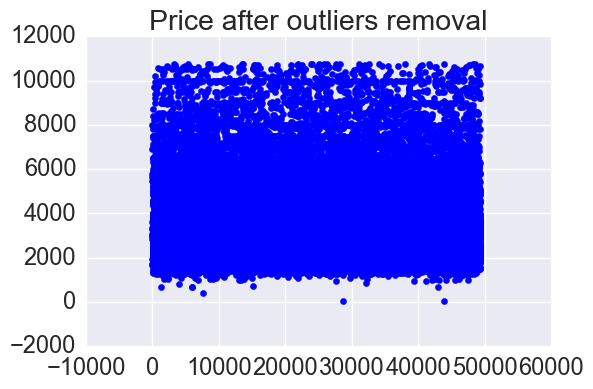

In [366]:
plt.figure(figsize=(6, 4))
plt.title('Price after outliers removal')
plt.scatter(np.arange(train.shape[0]), train['price'], color = 'blue');

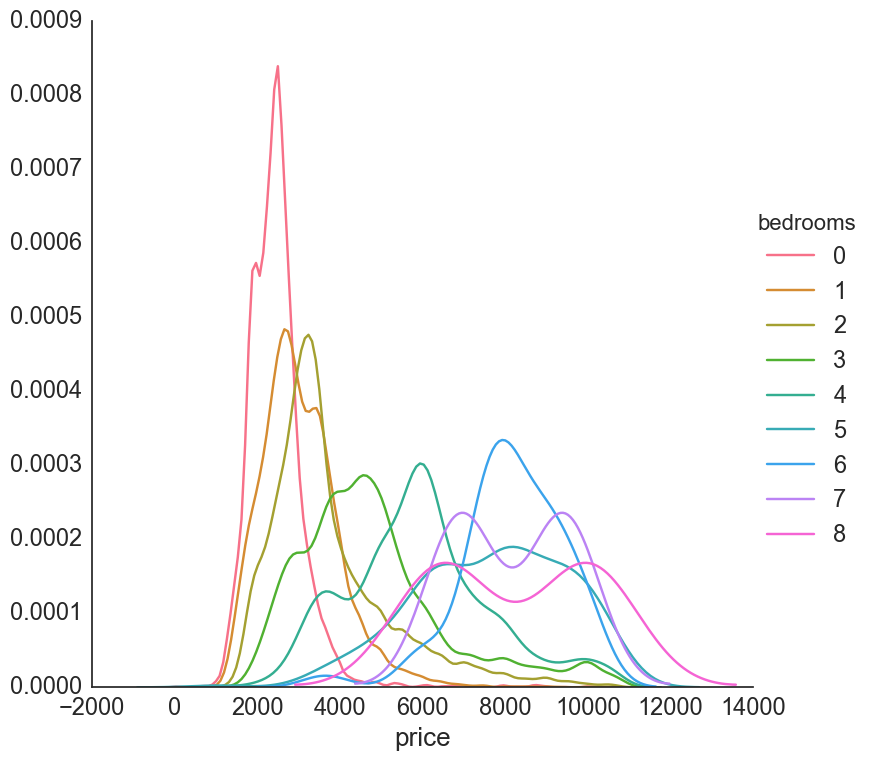

In [469]:
sns.FacetGrid(train, hue='bedrooms', size = 8).map(sns.kdeplot, 'price').add_legend();
plt.savefig('price_beds.jpg')

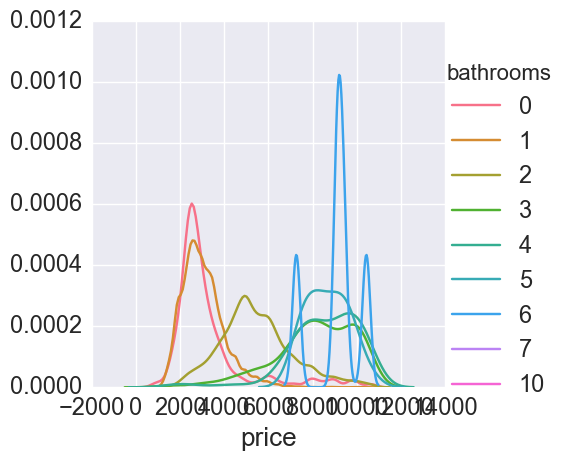

In [368]:
train['bathrooms'] = train['bathrooms'].astype(int)
sns.FacetGrid(train, hue='bathrooms', size = 5).map(sns.kdeplot, 'price').add_legend();

For the feature -- 'created' in the original dataset, we convert to datetime structure and accordingly create three new features
which are: month, day and month_day. We attempt to find out whether interest_level will be affected by the date.

In [369]:
train['created'] = pd.to_datetime(train['created'])

In [18]:
month = train['created'].apply(lambda x: x.month)
day   = train['created'].apply(lambda x: x.day)

In [19]:
train['created_month'] = month
train['created_day'] = day
train['created_month_day'] = (train['created_month'].astype(str) + train['created_day'].astype(str)).astype(int)

In [20]:
train_month_building_group = train.groupby(['building_id', 'created_month','interest_level'])['building_id'].count()
#train_month_building_group

In [21]:
#train_month_building_group

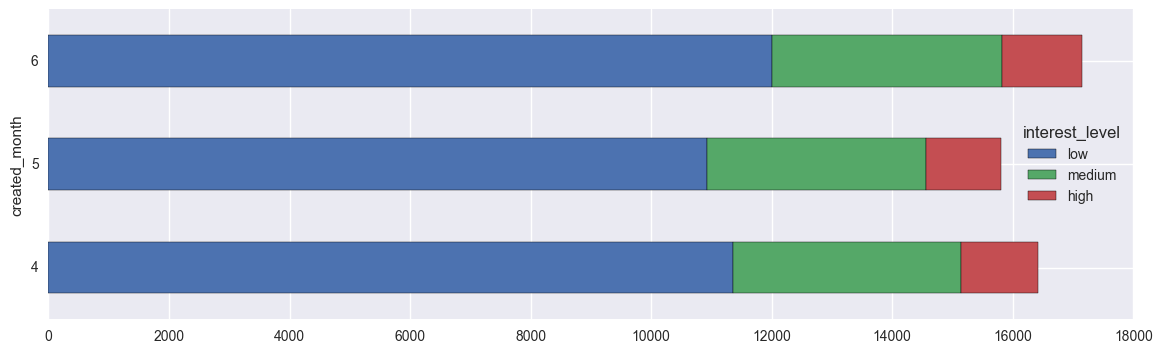

In [22]:
train_month_interest = train.groupby(
    ['created_month', 'interest_level'])['created_month'].count().unstack('interest_level')
train_month_interest[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(14, 4));

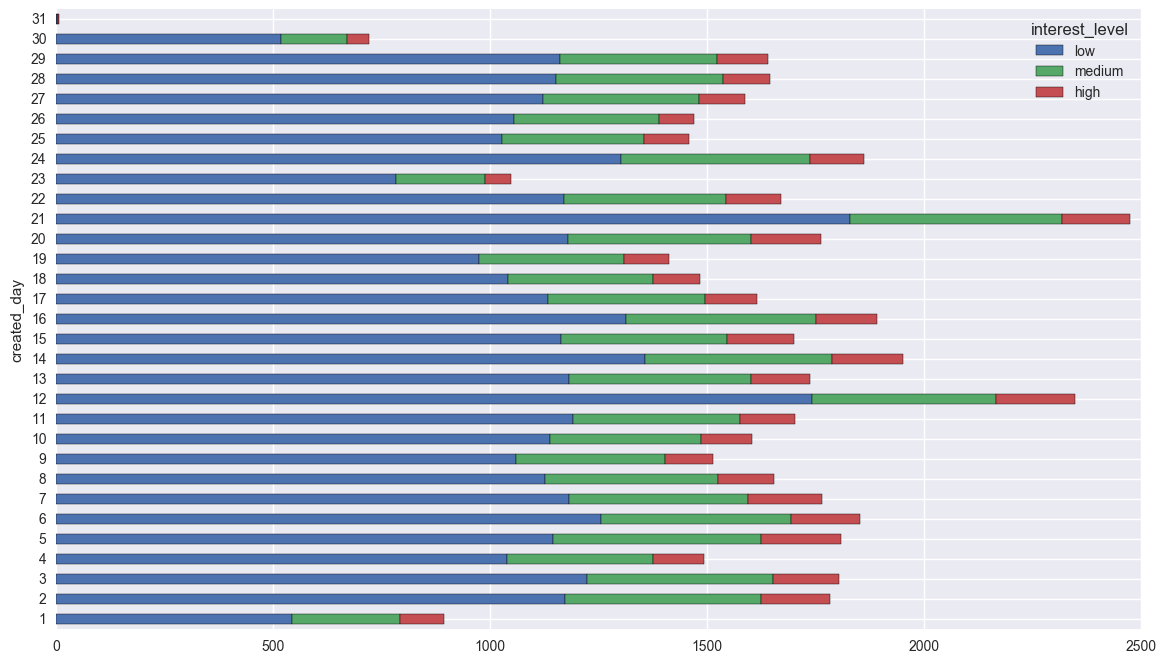

In [23]:
train_day_interest = train.groupby(
    ['created_day', 'interest_level'])['created_day'].count().unstack('interest_level')
train_day_interest[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(14, 8));

It seems that month/day equally contribute to the interest levels, but we will keep these three newly generated features for the time being, and if their influence on predicting interest_level is negligible, they might be discarded over feature selection steps. 

In [24]:
#grouped_date = train.groupby(
#    ['created_month_day', 'interest_level'])['created_month_day'].count().unstack('interest_level')
#grouped_date[['low', 'medium', 'high']].plot.barh(stacked=True, figsize=(4, 18));

For feature 'building_id', we want to know which buildings are interested the most. In the feature engineering stage, we will convert the building_id into categorical-typed feature through LabelEncoder. PS: Only those builing_ids are existing both train and test dataset will be encoded to categorical type features. For those building_id only exist in train data, we will set all to '-1' such that in the encoding stage, all of them will be encoded as '-1' type.

This strategy will be also applied to manager_id and display_address.

In [25]:
building_interest_group = train.groupby(['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)

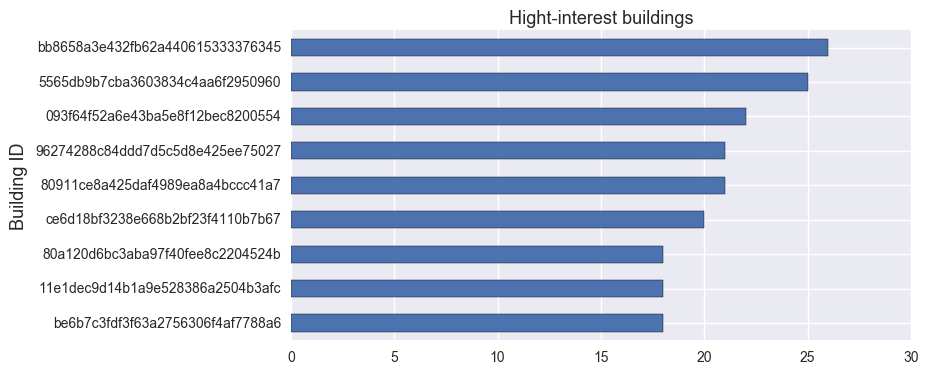

In [26]:
building_interest_group.sort_values('high', ascending=False)['high'].iloc[1:10][::-1].plot(kind='barh', figsize=(8,4));
plt.title('Hight-interest buildings', fontsize=13)
plt.ylabel('Building ID', fontsize=13);

In [27]:
manager_interest_group = train.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)

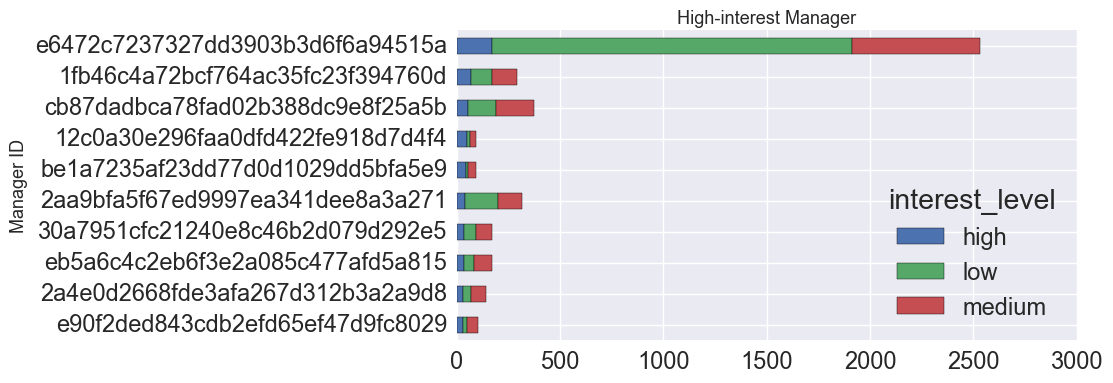

In [463]:
manager_interest_group.sort_values('high', ascending=False).iloc[0:10][::-1].plot(kind='barh', figsize=(8,4),
                                                                                         stacked=True);
plt.title('High-interest Manager', fontsize=13)
plt.ylabel('Manager ID', fontsize=13);

In [29]:
len(train['manager_id'].value_counts())

3481

In [30]:
#train.manager_id.value_counts()

It is useful to create a feature to count how many times each manager is listed

In [31]:
managerCnt_DF = pd.DataFrame(train['manager_id'].value_counts())
managerCnt_DF['managerCnt'] = managerCnt_DF['manager_id']
managerCnt_DF['manager_id'] = managerCnt_DF.index
managerCnt_DF.head(2)

,manager_id,managerCnt
e6472c7237327dd3903b3d6f6a94515a,e6472c7237327dd3903b3d6f6a94515a,2533
6e5c10246156ae5bdcd9b487ca99d96a,6e5c10246156ae5bdcd9b487ca99d96a,711


After creating the count feature, it is so clear that this feature has too wide ranged value and it has a very high skewness. So one of possible solution will be transformed into log-scale.

Skewness of manager count feature is: 32.453503


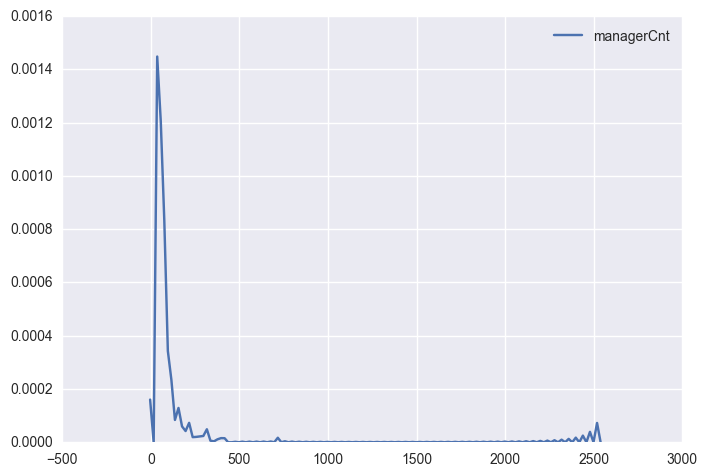

In [32]:
print('Skewness of manager count feature is: {0:2f}'.format(st.skew(managerCnt_DF['managerCnt'])))
sns.kdeplot(managerCnt_DF['managerCnt']);

Skewness of manager count feature in log-scale is: 0.601640


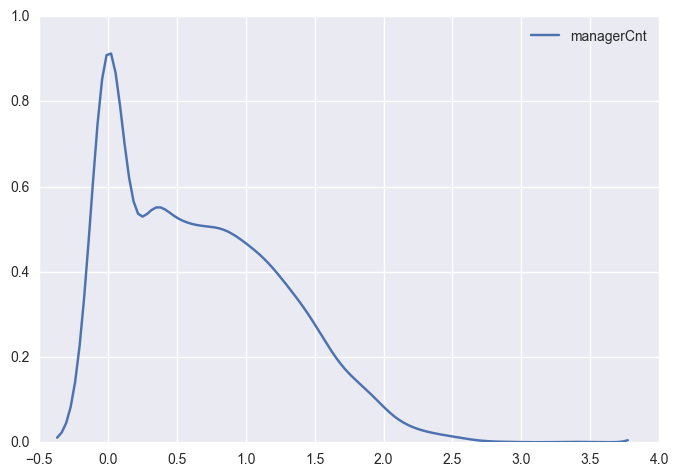

In [33]:
print('Skewness of manager count feature in log-scale is: {0:2f}'.format(st.skew(np.log10(managerCnt_DF['managerCnt']))))
sns.kdeplot(np.log10(managerCnt_DF['managerCnt']));

Clearly, it is a really good idea to convert manager count into log10-scale

In [34]:
managerCnt_DF['managerCnt_log'] = np.log10(managerCnt_DF['managerCnt'])

In [35]:
del managerCnt_DF['managerCnt']
#managerCnt_DF = managerCnt_DF.reset_index(drop=True)

In [36]:
print(managerCnt_DF.shape)
managerCnt_DF.head(2)

(3481, 2)


,manager_id,managerCnt_log
e6472c7237327dd3903b3d6f6a94515a,e6472c7237327dd3903b3d6f6a94515a,3.403635
6e5c10246156ae5bdcd9b487ca99d96a,6e5c10246156ae5bdcd9b487ca99d96a,2.851870


In [37]:
#trainDF.head(2)

In [38]:
# then we merge this new feature into the original train dataframe
#trainDF = pd.merge(trainDF, managerCnt_DF, how = 'left', on = 'manager_id', copy = False, left_index = True)
#trainDF.head(2)

train = pd.merge(train, managerCnt_DF, how = 'left', on = 'manager_id', copy = False, left_index = True)
train.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_month,created_day,created_month_day,managerCnt_log
5ba989232d0489da1b5f2c45f6688adc,1,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,6,24,624,1.954243
7533621a882f71e25173b27e3139d83d,1,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,6,12,612,1.934498


In [39]:
#train.index = train.index
#trainDF.head(3)

train.index = trainData_OG.index
train.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,created_month,created_day,created_month_day,managerCnt_log
10,1,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,6,24,624,1.954243
10000,1,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,6,12,612,1.934498
100004,1,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,4,17,417,2.127105


##### feature - photo: as this is the string for link to show photo of property, so we might convert it to the number of photos posted, but the new created feature needs to be standardardized, as its range is [0, 68]

In [40]:
train['num_photo'] = train['photos'].apply(lambda x: len(x))

In [41]:
from sklearn.preprocessing import MinMaxScaler
train['num_photo'] = MinMaxScaler().fit_transform(train['num_photo'])

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


##### listing_id - the listing_id is unique so it is alright if we remove the listing_id from data

In [42]:
len(train['listing_id'].unique()) == train.shape[0]

True

In [43]:
del train['listing_id']

## Wordcloud for text data

In [44]:
#Preprocessing
from wordcloud import WordCloud
import re

In [45]:
#print(train['description'].iloc[0])
#re.sub('<[^>]*>?', ' ', train['description'].iloc[0])

description

In [46]:
train['description'] = train['description'].apply(lambda text: re.sub('<[^>]*>?', ' ', text))

In [47]:
description_text = ' '.join(text for text in train['description'])

randomized the color of text shown in graph

In [48]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % np.random.randint(10, 240)

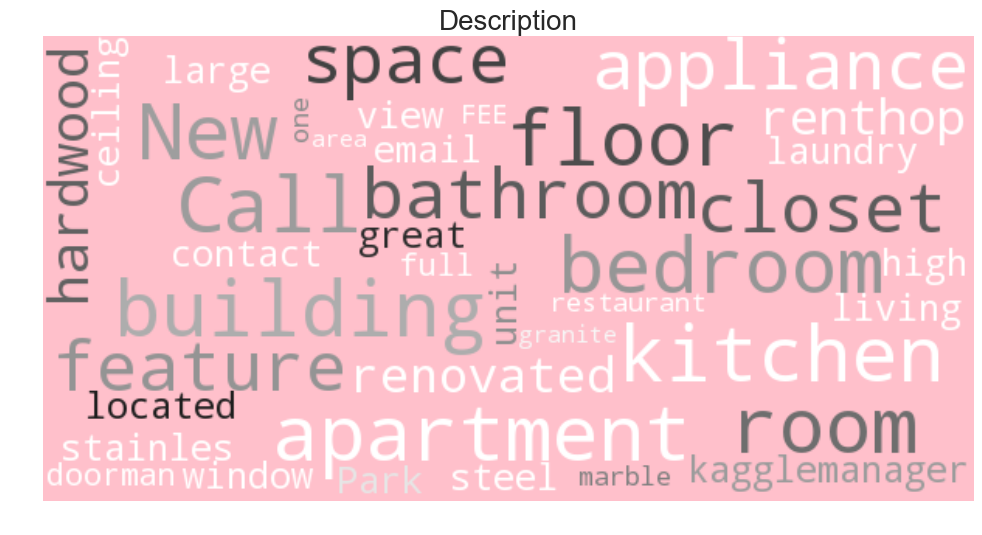

In [49]:
# wordcloud for description
plt.figure(figsize=(18,6))
wc = WordCloud(background_color='pink', width=600, height=300,
                      max_font_size=50, max_words=40).generate(description_text)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Description", fontsize=20)
plt.axis("off");

In [50]:
#train['description'].iloc[0]

display_address

In [51]:
train['display_address'] = train['display_address'].apply(lambda text: text.lower().strip())
dispAddText = ' '.join(text for text in train['display_address'])

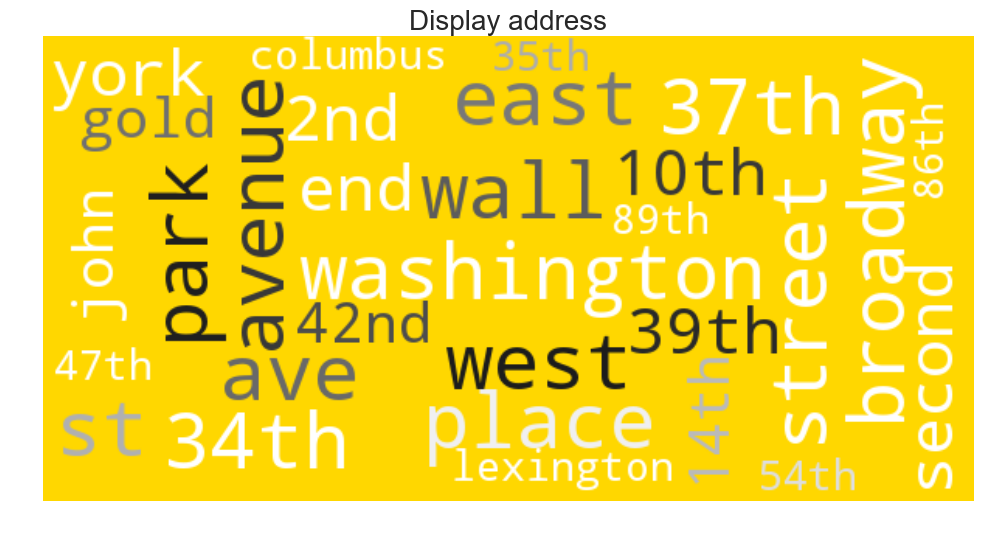

In [52]:
# wordcloud for display address
plt.figure(figsize=(18,6))
wc = WordCloud(background_color='gold', width=600, height=300,
                      max_font_size=50, max_words=30).generate(dispAddText)
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.title("Display address", fontsize=20)
plt.axis("off");

street_address

In [53]:
train['street_address'] = train['street_address'].apply(lambda text: text.lower().strip())
streetAddText = ' '.join(text for text in train['street_address'])

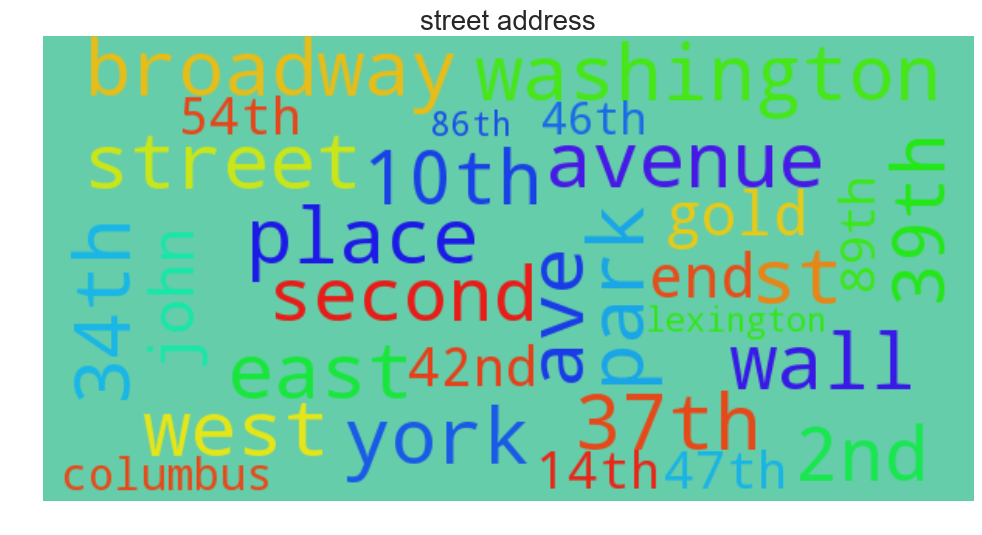

In [54]:
# wordcloud for street address
plt.figure(figsize=(18,6))
wc = WordCloud(background_color='mediumaquamarine', width=600, height=300,
                      max_font_size=50, max_words=30).generate(streetAddText)
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
wc.recolor(random_state=1)
plt.imshow(wc)
plt.title("street address", fontsize=20)
plt.axis("off");

features

In [55]:
#' '.join(train['features'].iloc[1])

In [56]:
#' '.join(text for text in train['features'].iloc[1])

In [57]:
#' '.join('_'.join(text.split(' ')) for text in train['features'].iloc[1])

In [58]:
#train['features'] = trainData_OG['features']

In [59]:
train['features'] = train['features'].apply(lambda featStr: ' '.join('_'.join(text.lower().split(' ')) for text in featStr))

In [60]:
featText = ' '.join(text for text in train['features'])

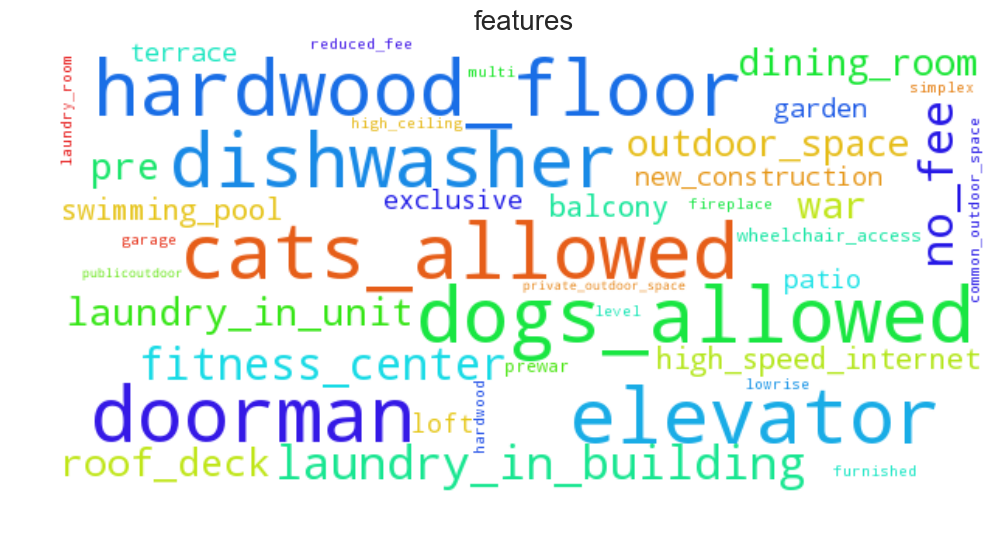

In [450]:
# wordcloud for features
plt.figure(figsize=(18,6))
wc = WordCloud(background_color='white', width=600, height=300,
                      max_font_size=50, max_words=40).generate(featText)
wc.recolor(random_state=0)
plt.imshow(wc)
plt.title("features", fontsize=20)
plt.axis("off");
plt.savefig('features.jpg')

In [62]:
#text_feature = ''
#text_disp_address = ''
#text_street = ''
#text_description =''

#for idx, row in train.iterrows():
#    for feature in row['features']:
#        text_feature = " ".join([text, "_".join(feature.strip().split(" "))])
#    text_disp_address = " ".join([text_disp_address,"_".join(row['display_address'].strip().split(" "))])
#    text_street = " ".join([text_street, row['street_address']])
#    text_description =" ".join([text_desc, row['description']])

#text_feature = text_feature.strip()
#text_disp_address = text_disp_address.strip()
#text_street = text_street.strip()
#text_description = text_description.strip()

In [63]:
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'created_month', 'created_day', 'created_month_day', 'managerCnt_log',
       'num_photo'],
      dtype='object')

### sentiment analysis --- feature and description

features

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

we want to know which words are used the most in both train and test, therefore we need to convert the features in test as well

In [65]:
#test['features'] = testData_OG['features']

In [66]:
test['features'] = test['features'].apply(lambda featStr: ' '.join('_'.join(text.lower().split(' ')) for text in featStr))

In [67]:
countvector = CountVectorizer(stop_words='english', max_features=150)
countvector.fit(list(train['features']) + list(test['features']))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=150, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [68]:
vocabulary = countvector.vocabulary_
#vocabulary

In [69]:
featWordCount = countvector.transform(train['features'])

In [70]:
featWordCount[1, :].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [71]:
featCount_DF = pd.DataFrame([ pd.Series(featWordCount[i].toarray().ravel()) for i in np.arange(featWordCount.shape[0]) ])

In [72]:
sorted(vocabulary.keys())[0:10]

['24',
 '_dishwasher_',
 '_dryer',
 '_pets_ok_',
 '_photos',
 'actual_apt',
 'air_conditioning',
 'backyard',
 'balcony',
 'basement_storage']

In [73]:
featCount_DF.columns = sorted(vocabulary.keys())
featCount_DF.head(4)

,24,_dishwasher_,_dryer,_pets_ok_,_photos,actual_apt,air_conditioning,backyard,balcony,basement_storage,bike_room,brownstone,building,business_center,cats_allowed,central_a,central_ac,children,childrens_playroom,common,common_outdoor_space,common_parking,common_roof_deck,common_terrace,concierge,...,space,speed_internet,stainless_steel_appliances,storage,sublet,subway,swimming_pool,terrace,time_doorman,unit_washer,valet,valet_parking,video_intercom,view,virtual_doorman,walk,walk_in_closet,war,washer,washer_,washer_in_unit,wheelchair_access,wheelchair_ramp,wifi_access,work
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
train = pd.concat([train.reset_index(), featCount_DF.reset_index()], axis = 1)
train.head(3)

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,created_month,created_day,created_month_day,managerCnt_log,num_photo,index,24,_dishwasher_,_dryer,_pets_ok_,...,space,speed_internet,stainless_steel_appliances,storage,sublet,subway,swimming_pool,terrace,time_doorman,unit_washer,valet,valet_parking,video_intercom,view,virtual_doorman,walk,walk_in_closet,war,washer,washer_,washer_in_unit,wheelchair_access,wheelchair_ramp,wifi_access,work
0,10,1,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,metropolitan avenue,,medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 metropolitan avenue,6,24,624,1.954243,0.073529,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10000,1,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,columbus avenue,doorman elevator fitness_center cats_allowed dogs_allowed,low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 columbus avenue,6,12,612,1.934498,0.161765,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,1,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",w 13 street,laundry_in_building dishwasher hardwood_floors pets_allowed_case_by_case,high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 w 13 street,4,17,417,2.127105,0.117647,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
train.index = train['index'].iloc[:,0]

In [76]:
del train['index']

In [77]:
train.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,created_month,created_day,created_month_day,managerCnt_log,num_photo,24,_dishwasher_,_dryer,_pets_ok_,_photos,actual_apt,...,space,speed_internet,stainless_steel_appliances,storage,sublet,subway,swimming_pool,terrace,time_doorman,unit_washer,valet,valet_parking,video_intercom,view,virtual_doorman,walk,walk_in_closet,war,washer,washer_,washer_in_unit,wheelchair_access,wheelchair_ramp,wifi_access,work
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,1,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,metropolitan avenue,,medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 metropolitan avenue,6,24,624,1.954243,0.073529,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000,1,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,columbus avenue,doorman elevator fitness_center cats_allowed dogs_allowed,low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 columbus avenue,6,12,612,1.934498,0.161765,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100004,1,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",w 13 street,laundry_in_building dishwasher hardwood_floors pets_allowed_case_by_case,high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 w 13 street,4,17,417,2.127105,0.117647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 description

In [78]:
from textblob import TextBlob

In [452]:
train['descp_objective'] = train['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
#train['descp_subjective'] = train['description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [460]:
#sns.FacetGrid(train, hue='interest_level', size=6).map(plt.scatter, 'descp_objective', 'descp_subjective').add_legend()

In [ ]:
'''
objectivityLevel = train['descp_objective'].value_counts().values


plt.plot(figsize=(8,4))
patches, texts, autotexts=plt.pie(objectivityLevel, startangle=90, explode=[0.1, 0, 0], labels=['low','medium'], 
        colors=['lightpink','steelblue'],autopct="%1.0f%%");
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
plt.title('Interest level', fontsize=20);
'''

#### we want to group features into categoric and other types, also convert the interest_level from string to categorical by using LabelEncoder

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
LE = LabelEncoder()
train['interest_level'] = LE.fit_transform(train['interest_level'])
train_interest_level = train['interest_level'].values

In [82]:
del train['interest_level']


In [83]:
train.dtypes.values

array([dtype('int32'), dtype('int64'), dtype('O'), dtype('<M8[ns]'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int32'),
       dtype('float64'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), d

In [84]:
categoric_feature = []
other_type = []
colName = train.columns
for name in colName:
    if type(train[name].iloc[0]) == np.float64 or type(train[name].iloc[0]) == np.int64:
        categoric_feature.append(name)
    else:
        other_type.append(name)

In [85]:
type(train['longitude'].iloc[0]) == np.float64

True

In [86]:
len(categoric_feature)

159

In [87]:
len(train.columns)

169

In [88]:
other_type

['bathrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'manager_id',
 'photos',
 'street_address',
 'created_month_day']

# Feature Importance

In [370]:
# first split train data into sub-training and cross-validation data
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

xtrain, xvalid, ytrain, yvalid = train_test_split(train[categoric_feature], train_interest_level, train_size = 0.7,
                                                 random_state=seed)

1. Random Forest
2. Extree Classifier
3. Gradient Boosting
4. XGBoost

### Random Forest

In [371]:
from sklearn.ensemble import RandomForestClassifier
seed = 7

In [372]:
# how many features we want to use to create the tree
propFeat = [0.25, 0.5, 0.75, 1]
#propFeat = [0.25]

In [373]:
# loop over all proportion values and fitted the method
varImp_RF = {}
for propVal in propFeat:
    print('RF '+str(propVal))
    RF = RandomForestClassifier(n_estimators=len(train.columns), max_features=propVal, random_state=seed)
    RF.fit(xtrain, ytrain)
    df = pd.DataFrame(data=np.zeros((len(categoric_feature),3)), \
                      columns=['featName','RF_Imp'+str(propVal),'RF_Rank'+str(propVal)])
    
    df['featName'] = categoric_feature
    df['RF_Imp'+str(propVal)] = RF.feature_importances_
    df = df.sort_values('RF_Imp'+str(propVal), ascending=False)
    rank = df.reset_index().index.values
    df['RF_Rank'+str(propVal)] = rank
    
    varImp_RF['RF'+str(propVal)] = df

RF 0.25
RF 0.5
RF 0.75
RF 1


In [374]:
varImp_RF.keys()

dict_keys(['RF0.25', 'RF0.5', 'RF0.75', 'RF1'])

In [375]:
varImp_RF['RF0.25'].head(3)

,featName,RF_Imp0.25,RF_Rank0.25
3,price,0.153594,0
1,latitude,0.095834,1
158,descp_objective,0.095795,2


In [376]:
for i, key in enumerate(varImp_RF.keys()):
    if i == 0:
        varImp_Rank_RF = varImp_RF[key]
    else:
        varImp_Rank_RF = pd.merge(varImp_Rank_RF, varImp_RF[key], on='featName')

In [377]:
varImp_Rank_RF.head(3)

,featName,RF_Imp0.25,RF_Rank0.25,RF_Imp0.5,RF_Rank0.5,RF_Imp0.75,RF_Rank0.75,RF_Imp1,RF_Rank1
0,price,0.153594,0,0.159392,0,0.159233,0,0.124263,0
1,latitude,0.095834,1,0.097631,3,0.098917,3,0.094822,3
2,descp_objective,0.095795,2,0.098721,2,0.099528,2,0.095821,1


In [378]:
#varImp_Rank_RF['RF_Rank_med'] = varImp_Rank_RF[['RF_Rank0.25','RF_Rank0.5','RF_Rank0.75','RF_Rank1']].median(axis=1)

### Extra Tree Classifier

In [379]:
from sklearn.ensemble import ExtraTreesClassifier

In [380]:
# loop over all proportion values and fitted the method
varImp_ExTree = {}
for propVal in propFeat:
    print('ExTree '+str(propVal))
    ExTree = ExtraTreesClassifier(n_estimators=len(train.columns), max_features=propVal, random_state=seed)
    ExTree.fit(xtrain, ytrain)
    df = pd.DataFrame(data=np.zeros((len(categoric_feature),3)), \
                      columns=['featName','ExTree_Imp'+str(propVal),'ExTree_Rank'+str(propVal)])
    
    df['featName'] = categoric_feature
    df['ExTree_Imp'+str(propVal)] = RF.feature_importances_
    df = df.sort_values('ExTree_Imp'+str(propVal), ascending=False)
    rank = df.reset_index().index.values
    df['ExTree_Rank'+str(propVal)] = rank
    
    varImp_ExTree['ExTree'+str(propVal)] = df

ExTree 0.25
ExTree 0.5
ExTree 0.75
ExTree 1


In [381]:
varImp_ExTree.keys()

dict_keys(['ExTree0.5', 'ExTree0.25', 'ExTree0.75', 'ExTree1'])

In [382]:
varImp_ExTree['ExTree0.25'].head(3)

,featName,ExTree_Imp0.25,ExTree_Rank0.25
3,price,0.124263,0
158,descp_objective,0.095821,1
5,created_day,0.095206,2


In [383]:
for i, key in enumerate(varImp_ExTree.keys()):
    if i == 0:
        varImp_Rank_ExTree = varImp_ExTree[key]
    else:
        varImp_Rank_ExTree = pd.merge(varImp_Rank_ExTree, varImp_ExTree[key], on='featName')

In [384]:
varImp_Rank_ExTree.head(3)

,featName,ExTree_Imp0.5,ExTree_Rank0.5,ExTree_Imp0.25,ExTree_Rank0.25,ExTree_Imp0.75,ExTree_Rank0.75,ExTree_Imp1,ExTree_Rank1
0,price,0.124263,0,0.124263,0,0.124263,0,0.124263,0
1,descp_objective,0.095821,1,0.095821,1,0.095821,1,0.095821,1
2,created_day,0.095206,2,0.095206,2,0.095206,2,0.095206,2


In [385]:
varImp_Rank_ExTree[['ExTree_Rank0.25','ExTree_Rank0.5','ExTree_Rank0.75','ExTree_Rank1']]

,ExTree_Rank0.25,ExTree_Rank0.5,ExTree_Rank0.75,ExTree_Rank1
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
5,5,5,5,5
6,6,6,6,6
7,7,7,7,7
8,8,8,8,8
9,9,9,9,9


### Gradient Boosting

In [386]:
from sklearn.ensemble import GradientBoostingClassifier

In [387]:
# loop over all proportion values and fitted the method
varImp_GBM = {}
for propVal in propFeat:
    print('GBM '+str(propVal))
    GBM = GradientBoostingClassifier(n_estimators=len(train.columns), max_features=propVal, random_state=seed)
    GBM.fit(xtrain, ytrain)
    df = pd.DataFrame(data=np.zeros((len(categoric_feature),3)), \
                      columns=['featName','GBM_Imp'+str(propVal),'GBM_Rank'+str(propVal)])
    
    df['featName'] = categoric_feature
    df['GBM_Imp'+str(propVal)] = RF.feature_importances_
    df = df.sort_values('GBM_Imp'+str(propVal), ascending=False)
    rank = df.reset_index().index.values
    df['GBM_Rank'+str(propVal)] = rank
    
    varImp_GBM['GBM'+str(propVal)] = df

GBM 0.25
GBM 0.5
GBM 0.75
GBM 1


In [388]:
varImp_GBM.keys()

dict_keys(['GBM1', 'GBM0.75', 'GBM0.5', 'GBM0.25'])

In [389]:
varImp_GBM['GBM0.25'].head(3)

,featName,GBM_Imp0.25,GBM_Rank0.25
3,price,0.124263,0
158,descp_objective,0.095821,1
5,created_day,0.095206,2


In [390]:
for i, key in enumerate(varImp_GBM.keys()):
    if i == 0:
        varImp_Rank_GBM = varImp_GBM[key]
    else:
        varImp_Rank_GBM = pd.merge(varImp_Rank_GBM, varImp_GBM[key], on='featName')

In [391]:
varImp_Rank_GBM.head(3)

,featName,GBM_Imp1,GBM_Rank1,GBM_Imp0.75,GBM_Rank0.75,GBM_Imp0.5,GBM_Rank0.5,GBM_Imp0.25,GBM_Rank0.25
0,price,0.124263,0,0.124263,0,0.124263,0,0.124263,0
1,descp_objective,0.095821,1,0.095821,1,0.095821,1,0.095821,1
2,created_day,0.095206,2,0.095206,2,0.095206,2,0.095206,2


In [392]:
varImp_Rank_GBM[['GBM_Rank0.25','GBM_Rank0.5','GBM_Rank0.75','GBM_Rank1']]

,GBM_Rank0.25,GBM_Rank0.5,GBM_Rank0.75,GBM_Rank1
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
5,5,5,5,5
6,6,6,6,6
7,7,7,7,7
8,8,8,8,8
9,9,9,9,9


Clearly, without cross-validation Boosting-type methods tend to be overfitting, as boosting is known as to be effective for solving underfitting -- reduce bias

In [393]:
varImp_Rank_RF['RF_Rank_med'] = varImp_Rank_RF[['RF_Rank0.25','RF_Rank0.5','RF_Rank0.75','RF_Rank1']].median(axis=1)

In [394]:
varImp_Rank_RF_MedSort = varImp_Rank_RF.sort_values('RF_Rank_med', ascending=True).reset_index()
rank_embdding_df = pd.DataFrame(data=np.zeros((varImp_Rank_RF.shape[0],2)), columns=['features', 'rank_embedding'])
rank_embdding_df['features'] = varImp_Rank_RF_MedSort['featName']
rank_embdding_df['rank_embedding'] = varImp_Rank_RF_MedSort.index.values
rank_embdding_df.head(3)

,features,rank_embedding
0,price,0
1,descp_objective,1
2,longitude,2


## feature importance (filter method)

1. SelectPercentile

In [395]:
#Libraries for SelectPercentile    
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif   

In [396]:
selector = SelectPercentile(score_func=f_classif, percentile=0.95*100)
selector.fit(train[categoric_feature], train_interest_level)

SelectPercentile(percentile=95.0,
         score_func=<function f_classif at 0x0000000051DFC730>)

In [397]:
rank_embdding_df

,features,rank_embedding
0,price,0
1,descp_objective,1
2,longitude,2
3,latitude,3
4,created_day,4
5,managerCnt_log,5
6,num_photo,6
7,bedrooms,7
8,created_month,8
9,no_fee,9


In [398]:
varImp_SP = selector.scores_
varImp_SP_df = pd.DataFrame(data=np.zeros((len(categoric_feature),2)),columns=['features','featImp_SP'])
varImp_SP_df['features'] = categoric_feature
varImp_SP_df['featImp_SP'] = varImp_SP
varImp_SP_df = varImp_SP_df.sort_values('featImp_SP', ascending=False)
varImp_SP_df

rank_SP = varImp_SP_df.reset_index().index.values
#varImp_SP_df['featRank_SP'] = rank_SP
#varImp_SP_df

rank_filtering_df = pd.DataFrame(data=np.zeros((varImp_SP_df.shape[0],2)), columns=['features', 'rank_filtering'])
rank_filtering_df['features'] = varImp_SP_df['features'].values
rank_filtering_df['rank_filtering'] = rank_SP
rank_filtering_df.head(3)

,features,rank_filtering
0,price,0
1,no_fee,1
2,hardwood_floors,2


Summarize the parameter ranks from embedding and filter methdos

In [399]:
rank_merge = pd.merge(rank_embdding_df, rank_filtering_df, on='features')
rank_merge.head(3)

,features,rank_embedding,rank_filtering
0,price,0,0
1,descp_objective,1,3
2,longitude,2,144


In [400]:
rank_merge['rank_final'] = rank_merge[['rank_embedding','rank_filtering']].mean(axis=1)

In [401]:
rank_merge.head(3)

,features,rank_embedding,rank_filtering,rank_final
0,price,0,0,0.0
1,descp_objective,1,3,2.0
2,longitude,2,144,73.0


In [402]:
rank_embedding_filter_final = pd.DataFrame(data=np.zeros((len(categoric_feature), 2)), columns=['features', 'rank'])
rank_embedding_filter_final['features'] = rank_merge.sort_values('rank_final', ascending=True)['features'].values
rank_embedding_filter_final['rank'] = rank_merge.sort_values('rank_final', ascending=True).reset_index().index.values
#rank_embedding_filter_final['importance'] = -rank_embedding_filter_final['rank'].values
#rank_embedding_filter_final.index = rank_embedding_filter_final['features'].values

In [403]:
rank_embedding_filter_final.head(4)

,features,rank
0,price,0
1,descp_objective,1
2,no_fee,2
3,hardwood_floors,3


In [404]:
#rank_embedding_filter_final['importance'][::1][0:5].plot(kind='barh')

In [124]:
type(rank_embedding_filter_final)

pandas.core.frame.DataFrame

In [405]:
rank_embedding_filter_final['importance'] = np.linspace(rank_embedding_filter_final.shape[0], \
                                                        1, num=rank_embedding_filter_final.shape[0], dtype=np.int)

In [406]:
rank_embedding_filter_final.head(3)

,features,rank,importance
0,price,0,159
1,descp_objective,1,158
2,no_fee,2,157


In [127]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [128]:
featPlotIdx = [0, 1, 2, 10, 20, 50, 100, 120 ,140]

In [129]:
# Scatter plot of 2010 unemployment rates
trace = go.Scatter(
    y = rank_embedding_filter_final.loc[featPlotIdx, 'importance'].values,
    x = rank_embedding_filter_final.loc[featPlotIdx,'features'].values,
    mode='markers',
    marker=dict(
        size= rank_embedding_filter_final.loc[featPlotIdx, 'importance'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = rank_embedding_filter_final.loc[featPlotIdx, 'importance'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = rank_embedding_filter_final.loc[featPlotIdx,'features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'feature importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'feature importance',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='feature importance')

# XGBoost

In [130]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [131]:
#xgb_model = xgb.XGBClassifier()

In [132]:
'''
#when in doubt, use xgboost
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              #'num_class':[3],
              'learning_rate': [0.03, 0.15], #so called `eta` value
              #'eval_metric': ['mlogloss'],
              'max_depth': [8],
              'min_child_weight': [3,11],
              'silent': [1],
              'subsample': [0.9],
              'colsample_bytree': [0.5],
              'n_estimators': [300], #number of trees
              'seed': [1337]}
'''

"\n#when in doubt, use xgboost\nparameters = {'nthread':[4], #when use hyperthread, xgboost may become slower\n              'objective':['multi:softmax'],\n              #'num_class':[3],\n              'learning_rate': [0.03, 0.15], #so called `eta` value\n              #'eval_metric': ['mlogloss'],\n              'max_depth': [8],\n              'min_child_weight': [3,11],\n              'silent': [1],\n              'subsample': [0.9],\n              'colsample_bytree': [0.5],\n              'n_estimators': [300], #number of trees\n              'seed': [1337]}\n"

In [133]:
#evaluate with roc_auc_truncated
def _score_func(estimator, X, y):
    pred = estimator.predict(X)
    return accuracy_score(y, pred)

In [134]:
'''
#should evaluate by train_eval instead of the full dataset
clf = GridSearchCV(xgb_model, parameters, n_jobs=4, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                    scoring=_score_func,
                   verbose=0, refit=True)
'''

'\n#should evaluate by train_eval instead of the full dataset\nclf = GridSearchCV(xgb_model, parameters, n_jobs=4, \n                   cv=StratifiedKFold(n_splits=5, shuffle=True), \n                    scoring=_score_func,\n                   verbose=0, refit=True)\n'

In [135]:
from sklearn.cross_validation import train_test_split

In [407]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train[categoric_feature], train_interest_level, train_size=0.7)

In [137]:
#clf.fit(xtrain, ytrain)

In [138]:
#best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
#print('Raw AUC score:', score)
#for param_name in sorted(best_parameters.keys()):
#    print("%s: %r" % (param_name, best_parameters[param_name]))

In [408]:
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.02
param['max_depth'] = 6
param['silent'] = 1
param['num_class'] = 3
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 3
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['seed'] = 321
param['nthread'] = 8
num_rounds = 1000

In [409]:
subFeature_75 = rank_embedding_filter_final['features'].iloc[0:118].values

In [410]:
num_rounds = 1000
xgtrain_75ImpFeat = xgb.DMatrix(xtrain[subFeature_75], label=ytrain)
clf_75ImpFeat = xgb.train(param, xgtrain_75ImpFeat, num_rounds)

In [411]:
xgtrain = xgb.DMatrix(xtrain, label=ytrain)
xgvalid = xgb.DMatrix(xvalid, label=yvalid)
#watchlist = [(xgvalid, 'valid'), (xgtrain, 'train')]
#clf_full = xgb.train(param, xgtrain, num_rounds, watchlist)
clf_full = xgb.train(param, xgtrain, num_rounds)

In [412]:
#xgtrain_75ImpFeat = xgb.DMatrix(xtrain[subFeature], label=ytrain)
xgvalid_75ImpFeat = xgb.DMatrix(xvalid[subFeature_75])

#### subsampling for imbalance validation set

In [413]:
np.unique(yvalid)

array([0, 1, 2], dtype=int64)

In [414]:
print((yvalid==0).sum())
print((yvalid==1).sum())
print((yvalid==2).sum())

1158
10258
3390


In [415]:
import random

In [416]:
Idx_high = np.where(yvalid==0)[0]
Idx_low = np.where(yvalid==1)[0]
Idx_medium = np.where(yvalid == 2)[0]
subIdx_low = np.random.choice(Idx_low, size=(yvalid==0).sum())
subIdx_medium = np.random.choice(Idx_medium, size=(yvalid==0).sum())

In [417]:
Idx_high_train = np.where(ytrain==0)[0]
Idx_low_train = np.where(ytrain==1)[0]
Idx_medium_train = np.where(ytrain == 2)[0]
subIdx_low_train = np.random.choice(Idx_low_train, size=(ytrain==0).sum())
subIdx_medium_train = np.random.choice(Idx_medium_train, size=(ytrain==0).sum())

In [491]:
len(subIdx_medium_train)

2681

In [510]:
subIdx = np.hstack((Idx_high, subIdx_low, subIdx_medium))
subIdx_shuffle = sorted(subIdx, key=lambda k: random.random())
#subIdx_shuffle = np.random.sample(subIdx, len(subIdx))

In [511]:
subIdx_train = np.hstack((Idx_high_train, subIdx_low_train, subIdx_medium_train))
subIdx_shuffle_train = sorted(subIdx_train, key=lambda k: random.random())
#subIdx_shuffle = np.random.sample(subIdx, len(subIdx))

In [512]:
ytrain_subset_balance = ytrain[subIdx_shuffle_train]
yvalid_subset_balance = yvalid[subIdx_shuffle]

In [513]:
len(yvalid_subset_balance)

3474

In [514]:
len(ytrain_subset_balance)

8043

In [515]:
#plt.hist(ytrain_subset_balance);

In [516]:
xtrain_subset_balance = xtrain.iloc[subIdx_shuffle_train,:]
xtrain_75Feat_subset_balance = xtrain_subset_balance[subFeature_75]

xvalid_subset_balance = xvalid.iloc[subIdx_shuffle,:]
xvalid_75Feat_subset_balance = xvalid_subset_balance[subFeature_75]

In [517]:
xgtrain_75ImpFeat_subset_balance = xgb.DMatrix(xtrain_75Feat_subset_balance)
xgvalid_75ImpFeat_subset_balance = xgb.DMatrix(xvalid_75Feat_subset_balance)

In [518]:
xgtrain_fullFeat_subset_balance = xgb.DMatrix(xtrain_subset_balance)
xgvalid_fullFeat_subset_balance = xgb.DMatrix(xvalid_subset_balance)

In [519]:
predTrain_75ImpFeat_subset_balance  = np.argmax(clf_75ImpFeat.predict(xgtrain_75ImpFeat_subset_balance),  axis=1)
predValid_75ImpFeat_subset_balance  = np.argmax(clf_75ImpFeat.predict(xgvalid_75ImpFeat_subset_balance),  axis=1)

In [520]:
predTrain_fullFeat_subset_balance  = np.argmax(clf_full.predict(xgtrain_fullFeat_subset_balance),  axis=1)
predValid_fullFeat_subset_balance  = np.argmax(clf_full.predict(xgvalid_fullFeat_subset_balance),  axis=1)

In [521]:
len(predTrain_75ImpFeat_subset_balance)

8043

In [522]:
accuracy_score(yvalid_subset_balance, predValid_75ImpFeat_subset_balance)

0.50719631548647093

In [523]:
accuracy_score(ytrain_subset_balance, predTrain_fullFeat_subset_balance)

0.62974014671142609

In [524]:
confusion_matrix(yvalid_subset_balance, predValid_75ImpFeat_subset_balance)

array([[ 288,  374,  496],
       [   3, 1105,   50],
       [  51,  738,  369]])

In [525]:
predTrain_confMat_balance = confusion_matrix(ytrain_subset_balance, predTrain_75ImpFeat_subset_balance)

In [526]:
predTrain_75ImpFeat = np.argmax(clf_75ImpFeat.predict(xgtrain_75ImpFeat), axis=1)
predValid_75ImpFeat  = np.argmax(clf_75ImpFeat.predict(xgvalid_75ImpFeat),  axis=1)

In [527]:
accuracy_score(ytrain, predTrain_75ImpFeat)

0.81262664273721996

In [528]:
accuracy_score(yvalid, predValid_75ImpFeat)

0.74591381872213969

In [529]:
ytrain.shape

(34546,)

In [530]:
yvalid.shape

(14806,)

In [531]:
from sklearn.metrics import confusion_matrix

In [532]:
ytrain_string = LE.inverse_transform(ytrain)
yvalid_string = LE.inverse_transform(yvalid)
predValid_75ImpFeat_string = LE.inverse_transform(predValid_75ImpFeat)
predTrain_75ImpFeat_string = LE.inverse_transform(predTrain_75ImpFeat)

In [533]:
feat75_valid_confMat = confusion_matrix(yvalid, predValid_75ImpFeat)
feat75_train_confMat = confusion_matrix(ytrain, predTrain_75ImpFeat)
feat75_valid_string_confMat = confusion_matrix(yvalid_string, predValid_75ImpFeat_string)
feat75_train_string_confMat = confusion_matrix(ytrain_string, predTrain_75ImpFeat_string)

In [534]:
feat75_valid_confMat

array([[ 288,  374,  496],
       [  54, 9640,  564],
       [ 130, 2144, 1116]])

In [535]:
np.where(yvalid_string == 'medium',1,0).sum()

3390

In [536]:
feat75_valid_confMat = feat75_valid_confMat/feat75_valid_confMat.sum(axis=1).sum(axis=0)
feat75_valid_string_confMat = feat75_valid_string_confMat/feat75_valid_string_confMat.sum(axis=1).sum(axis=0)

In [537]:
predTrain_confMat_balance

array([[1214,  700,  767],
       [   9, 2581,   91],
       [  43, 1388, 1250]])

In [538]:
feat75_train_balance_confMat_DF = pd.DataFrame(predTrain_confMat_balance, columns=['high','low','medium'], index=['high','low','medium'])
feat75_train_balance_confMat_DF

,high,low,medium
high,1214,700,767
low,9,2581,91
medium,43,1388,1250


In [539]:
feat75_train_balance_confMat_DF

,high,low,medium
high,1214,700,767
low,9,2581,91
medium,43,1388,1250


In [540]:
1894/2681

0.7064528161133905

In [543]:
feat75_train_balance_confMat_DF

,high,low,medium
high,2094,300,287
low,9,2581,91
medium,103,605,1973


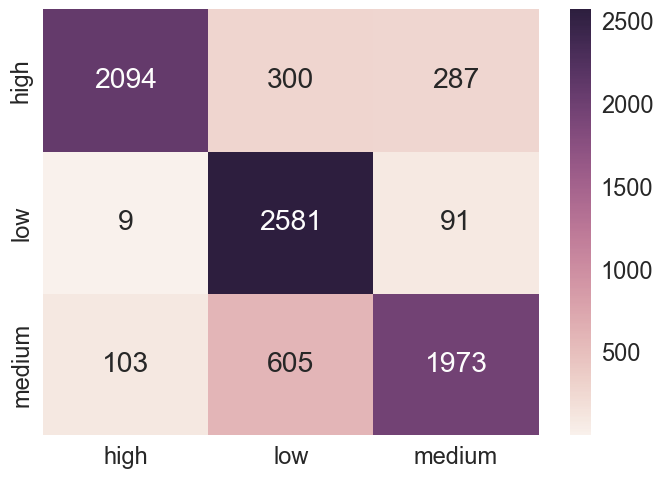

In [546]:
#plt.figure(figsize=(6,4))
#plt.matshow(feat75_train_confMat);
sns.set(font_scale=1.7)
sns.heatmap(feat75_train_balance_confMat_DF, annot=True, fmt='d');
plt.savefig('validPred_confmat.pdf')
plt.savefig('validPred_confmat.jpg')

In [351]:
trainData_OG.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'interest_level', 'latitude',
       'listing_id', 'longitude', 'manager_id', 'photos', 'price',
       'street_address'],
      dtype='object')

In [183]:
feat75_valid_string_confMat

array([[ 0.01884371,  0.02397677,  0.03626908],
       [ 0.00378225,  0.64662974,  0.03964609],
       [ 0.01094151,  0.14581926,  0.07409158]])

,low,medium,high
low,0.018844,0.023977,0.036269
medium,0.003782,0.646630,0.039646
high,0.010942,0.145819,0.074092


In [344]:
'''
xgtrain = xgb.DMatrix(xtrain, label=ytrain)
xgvalid = xgb.DMatrix(xvalid, label=yvalid)
#watchlist = [(xgvalid, 'valid'), (xgtrain, 'train')]
#clf_full = xgb.train(param, xgtrain, num_rounds, watchlist)
clf_full = xgb.train(param, xgtrain, num_rounds)
''''''

In [ ]:
predTrain_full = np.argmax(clf_full.predict(xgtrain), axis=1)
predValid_full  = np.argmax(clf_full.predict(xgvalid),  axis=1)

In [ ]:
accuracy_score(ytrain, predTrain_full)

In [ ]:
accuracy_score(yvalid, predValid_full)

In [ ]:
subFeature_50 = rank_embedding_filter_final['features'].iloc[0:round(rank_embedding_filter_final.shape[0]*0.5)].values

In [ ]:
xgtrain_50ImpFeat = xgb.DMatrix(xtrain[subFeature_50], label=ytrain)
clf_50ImpFeat = xgb.train(param, xgtrain_50ImpFeat, num_rounds)

In [ ]:
#xgtrain_50ImpFeat = xgb.DMatrix(xtrain[subFeature_50], label=ytrain)
xgvalid_50ImpFeat = xgb.DMatrix(xvalid[subFeature_50])

In [ ]:
predTrain_50ImpFeat = np.argmax(clf_50ImpFeat.predict(xgtrain_50ImpFeat), axis=1)
predValid_50ImpFeat  = np.argmax(clf_50ImpFeat.predict(xgvalid_50ImpFeat),  axis=1)

In [ ]:
accuracy_score(ytrain, predTrain_50ImpFeat)

In [ ]:
accuracy_score(yvalid, predValid_50ImpFeat)

In [ ]:
subFeature_20 = rank_embedding_filter_final['features'].iloc[0:round(rank_embedding_filter_final.shape[0]*0.2)].values

In [ ]:
xgtrain_20ImpFeat = xgb.DMatrix(xtrain[subFeature_20], label=ytrain)
clf_20ImpFeat = xgb.train(param, xgtrain_20ImpFeat, num_rounds)

In [ ]:
xgvalid_20ImpFeat = xgb.DMatrix(xvalid[subFeature_20])

In [ ]:
predTrain_20ImpFeat = np.argmax(clf_20ImpFeat.predict(xgtrain_20ImpFeat), axis=1)
predValid_20ImpFeat  = np.argmax(clf_20ImpFeat.predict(xgvalid_20ImpFeat),  axis=1)

In [ ]:
accuracy_score(ytrain, predTrain_20ImpFeat)

In [ ]:
accuracy_score(yvalid, predValid_20ImpFeat)

In [ ]:
subFeature_85 = rank_embedding_filter_final['features'].iloc[0:round(rank_embedding_filter_final.shape[0]*0.85)].values
xgtrain_85ImpFeat = xgb.DMatrix(xtrain[subFeature_85], label=ytrain)
clf_85ImpFeat = xgb.train(param, xgtrain_85ImpFeat, num_rounds)
xgvalid_85ImpFeat = xgb.DMatrix(xvalid[subFeature_85])
predTrain_85ImpFeat = np.argmax(clf_85ImpFeat.predict(xgtrain_85ImpFeat), axis=1)
predValid_85ImpFeat  = np.argmax(clf_85ImpFeat.predict(xgvalid_85ImpFeat),  axis=1)
print(accuracy_score(ytrain, predTrain_85ImpFeat))
print(accuracy_score(yvalid, predValid_85ImpFeat))